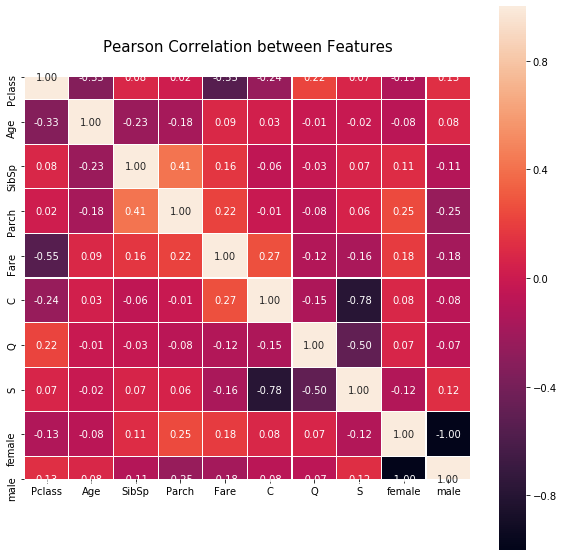

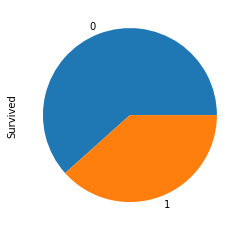

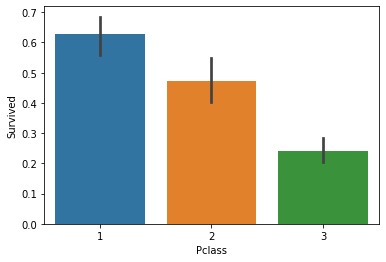

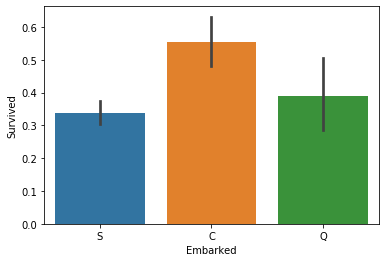

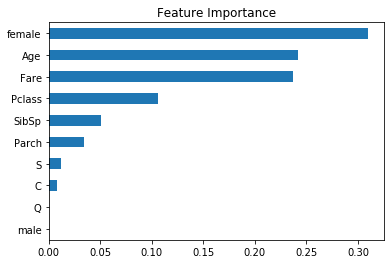

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# 数据加载
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
# 使用票价的均值填充票价中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)
#print(train_data['Embarked'].value_counts())
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]

# 显示特征之间的相关系数
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation between Features',y=1.05,size=15)
train_data_hot_encoded = train_features.drop('Embarked',1).join(train_features.Embarked.str.get_dummies())
train_data_hot_encoded = train_data_hot_encoded.drop('Sex',1).join(train_data_hot_encoded.Sex.str.get_dummies())
# 计算特征之间的Pearson系数，即相似度
sns.heatmap(train_data_hot_encoded.corr(),linewidths=0.1,vmax=1.0, fmt= '.2f', square=True,linecolor='white',annot=True)
plt.show()


# 使用饼图来进行Survived取值的可视化
#print(type(train_data["Survived"].value_counts()))
train_data["Survived"].value_counts().plot(kind = "pie", label='Survived')
plt.show()

# 不同的Pclass,幸存人数(条形图)
sns.barplot(x = 'Pclass', y = "Survived", data = train_data);
plt.show()

# 不同的Embarked,幸存人数(条形图)
sns.barplot(x = 'Embarked', y = "Survived", data = train_data);
plt.show()


# 训练并显示特征向量的重要程度
def train(train_features, train_labels):
	# 构造CART决策树
	clf = DecisionTreeClassifier()
	# 决策树训练
	clf.fit(train_features, train_labels)
	# 显示特征向量的重要程度
	coeffs = clf.feature_importances_
	#print(coeffs)
	df_co = pd.DataFrame(coeffs, columns=["importance_"])
	# 下标设置为Feature Name
	df_co.index = train_features.columns
	#print(df_co.index)
	df_co.sort_values("importance_", ascending=True, inplace=True)
	df_co.importance_.plot(kind="barh")

	plt.title("Feature Importance")
	plt.show()
	return clf

clf = train(train_data_hot_encoded, train_data["Survived"])

# 决策树可视化
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

def show_tree(clf):
	dot_data = StringIO()
	export_graphviz(clf, out_file=dot_data)
	graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
	graph.write_pdf("titanic_tree.pdf")

show_tree(clf)